# Explore the relationship between homopolymers and error
---

In [1]:
import os
import sys
import configparser
import getopt
import numpy as np
import pandas as pd
from collections import Counter

from lib.error import *

In [26]:
from matplotlib import lines
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style('white')
sns.set_style('ticks')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.figsize'] = [4, 4]

## Preference

In [3]:
expt_dir = "../analysis/ont/zambia/2019-04-10"
cntrl_sample = "BC05"

# I. Merge

In [10]:
kelch = pd.read_csv(os.path.join(expt_dir, cntrl_sample + ".KELCH13.reverse.nt_error.csv"))
kelch = convert_to_frequencies(kelch, "total", ["position", "ref", "total"])

In [11]:
seq = "".join(kelch.ref)
homopolymers = annotate_homopolymers(seq)
kelch = pd.merge(left=kelch,
                 right=homopolymers.drop("ref", 1),
                 on="position")

In [12]:
dhfr = pd.read_csv(os.path.join(expt_dir, cntrl_sample + ".DHFR.nt_error.csv"))
dhfr = convert_to_frequencies(dhfr, "total", ["position", "ref", "total"])

In [13]:
seq = "".join(dhfr.ref)
homopolymers = annotate_homopolymers(seq)
dhfr = pd.merge(left=dhfr,
                right=homopolymers.drop("ref", 1),
                on="position")

In [14]:
crt = pd.read_csv(os.path.join(expt_dir, cntrl_sample + ".CRT.nt_error.csv"))
crt.query("total > 1", inplace=True)
crt = convert_to_frequencies(crt, "total", ["position", "ref", "total"])

In [15]:
seq = "".join(crt.ref)
homopolymers = annotate_homopolymers(seq)
crt = pd.merge(left=crt,
               right=homopolymers.drop("ref", 1),
               on="position")

In [16]:
msp = pd.read_csv(os.path.join(expt_dir, cntrl_sample + ".MSP2.reverse.nt_error.csv"))
msp = convert_to_frequencies(msp, "total", ["position", "ref", "total"])

In [17]:
seq = "".join(msp.ref)
homopolymers = annotate_homopolymers(seq)
msp = pd.merge(left=msp,
               right=homopolymers.drop("ref", 1),
               on="position")

In [18]:
genes = [kelch, dhfr, crt, msp]
gene_df = pd.concat(genes)

# II. Plot

In [48]:
means = gene_df.groupby("homo_len")[["SNV", "+", "-"]].mean()[1:]
stds = gene_df.groupby("homo_len")[["SNV", "+", "-"]].std()[1:]
ns = gene_df.groupby("homo_len").size()[1:]
sems = stds.div(np.sqrt(ns), axis='rows')

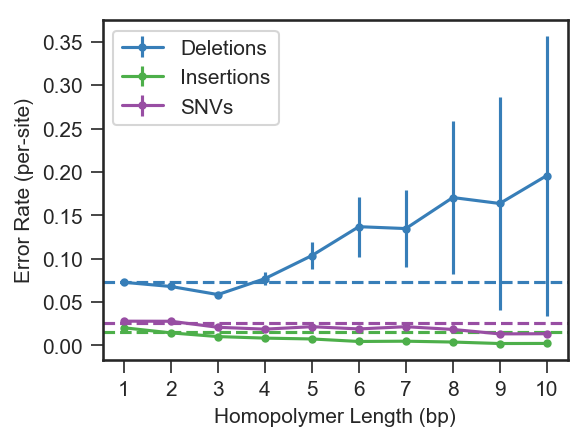

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

cols = sns.color_palette("Set1", 4)[1:]  # to match nt_error_rate notebook
params = {
    "-": "Deletions",
    "+": "Insertions",
    "SNV": "SNVs"
}

for col, p in zip(cols, params):
    ax.errorbar(x=means[p].index, y=means[p],
                marker='o', markersize=3, color=col,
                yerr=sems[p]*1.96, label=params[p])
    ax.axhline(y=gene_df[p].mean(), linestyle='dashed', color=col)

ax.set_xticks(np.arange(1, 11))
ax.set_xticklabels(np.arange(1, 11))
ax.set_xlabel("Homopolymer Length (bp)")
ax.set_ylabel("Error Rate (per-site)")
ax.legend(loc="upper left", frameon=True)

Would be nice to explore what percentage of deletions reside within homopolymers -- i.e. what proportion of deletions errors are explained by homopolymers?